In [137]:
%%html
<h1 >Pneumoia Detection with CNN model of PulmoNet</h1>
<p style="font-weight: bold">The large number of deaths by pneumonia alarms scientists worldwide
to propose more effective and acute methods to detect pneumonia. With technology developing, more and
more measures are developed, in which radiology-based methods are most popular and useful.This coursework 
emphasises on implantation of AI technologies of computer science that are possible to impact global situations
against COVID-19 and decrease its effect.</br></br>
The goal of this work is to create diagnostic andprognostic models via
X-ray to overcome the complexity of detection to cure with COVID-19 patients suffering from pneumonia.</p>
<p style="font-weight: bold; color:green">Author: Anvar Bekmuratov
</br>Lecturer Advisor: Mr. Eugene Castro</p>

In [1]:
import numpy as np    
import pandas as pd   
from matplotlib import pyplot as plt
import cv2
import os as os
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers.core import Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import random


print("Tensorflow version is ", tf.__version__)


EPOCHS = 20 #number of epochs
BATCH_SIZE = 32 #batch_size
IMG_SIZE = 160 #image size
LR_RATE = 1e-6 #learining rate


Tensorflow version is  2.8.0


In [2]:
%%html
<h1 style="color:green">Loading and preprocess data</h1>

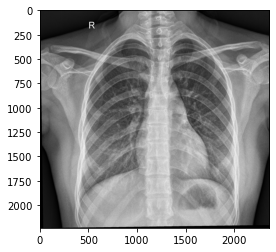

In [3]:
labels = ["NORMAL", "PNEUMONIA"]
sample_data_dir = "/Users/anvar_ghost/Downloads/chest_xray/train"#insert path of Kaggle dataset /train
#chechking if data was loaded and preproccessing it 
for label in labels:
    path = os.path.join(sample_data_dir, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(2234, 2359)


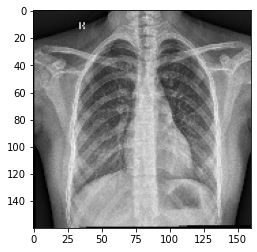

In [5]:
#checking appropiate img scan size for images
n_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(n_array, cmap="gray")
plt.show()

In [6]:
DATA = []
labels = ["NORMAL", "PNEUMONIA"]


def get_data(data_dir):
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            DATA.append([resized_array, class_num])
    return np.array(DATA)

In [7]:
train_data = get_data("/Users/anvar_ghost/Downloads/chest_xray/train")#insert path of Kaggle dataset /train
test_data = get_data("/Users/anvar_ghost/Downloads/chest_xray/test")#insert path of Kaggle dataset /test
val_data = get_data("/Users/anvar_ghost/Downloads/chest_xray/val")#insert path of Kaggle dataset /val

/var/folders/kl/zcqfzqfx4z99w0r7g7l3mxgm0000gn/T/ipykernel_46390/441745891.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(DATA)


                                                      0  1
0     [[28, 27, 28, 29, 28, 28, 29, 28, 28, 28, 31, ...  0
1     [[109, 59, 55, 51, 44, 79, 83, 83, 89, 90, 102...  0
2     [[46, 54, 65, 75, 78, 87, 91, 95, 99, 105, 116...  0
3     [[0, 9, 14, 26, 36, 43, 50, 54, 56, 64, 69, 74...  0
4     [[114, 117, 120, 122, 128, 132, 135, 193, 175,...  0
...                                                 ... ..
5211  [[0, 0, 1, 14, 15, 11, 17, 21, 22, 23, 23, 219...  1
5212  [[39, 40, 43, 43, 49, 51, 54, 55, 55, 59, 56, ...  1
5213  [[7, 8, 10, 10, 253, 14, 15, 254, 15, 18, 19, ...  1
5214  [[39, 40, 40, 40, 40, 41, 40, 40, 42, 50, 49, ...  1
5215  [[43, 44, 50, 60, 97, 136, 117, 107, 107, 112,...  1

[5216 rows x 2 columns]


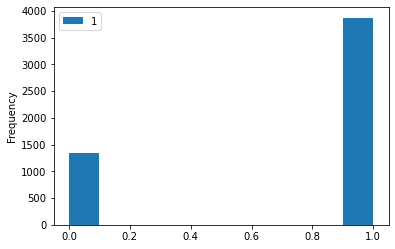

In [8]:
#checking if data was loaded and number of images
df = pd.DataFrame(train_data)
print(df)
df.plot(kind = 'hist')
plt.show()

In [9]:
random.shuffle(train_data)


                                                      0  1
0     [[28, 27, 28, 29, 28, 28, 29, 28, 28, 28, 31, ...  0
1     [[28, 27, 28, 29, 28, 28, 29, 28, 28, 28, 31, ...  0
2     [[28, 27, 28, 29, 28, 28, 29, 28, 28, 28, 31, ...  0
3     [[46, 54, 65, 75, 78, 87, 91, 95, 99, 105, 116...  0
4     [[109, 59, 55, 51, 44, 79, 83, 83, 89, 90, 102...  0
...                                                 ... ..
5211  [[40, 43, 43, 44, 49, 43, 45, 43, 50, 57, 56, ...  0
5212  [[0, 0, 13, 11, 15, 20, 15, 1, 19, 31, 28, 39,...  0
5213  [[35, 40, 40, 37, 41, 48, 44, 44, 47, 46, 45, ...  0
5214  [[6, 8, 10, 11, 11, 10, 11, 12, 11, 13, 13, 14...  1
5215  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  0

[5216 rows x 2 columns]


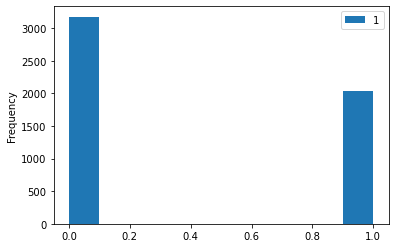

In [10]:
#checking if data was loaded and number of images
df = pd.DataFrame(train_data)
print(df) 
df.plot(kind = 'hist')

plt.show()

In [11]:
for title in train_data[-20:]:
    print(title[1])
    
#checking dataset
#0 stands for normal images
#1 stands for pneumonia  images



1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0


Text(0.5, 1.0, 'PNEUMONIA')

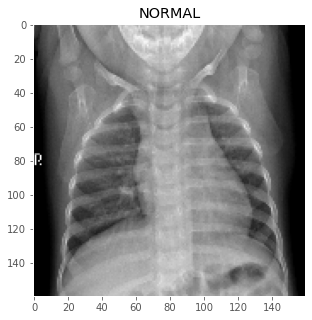

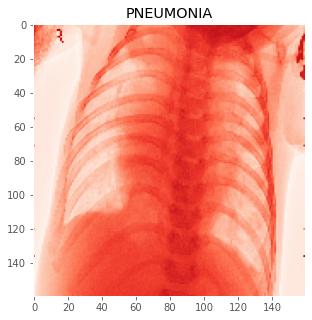

In [134]:
#plotting images with labels
plt.figure(figsize = (5,5))
plt.grid(False)
plt.imshow(train_data[10][0],cmap="gray")
plt.title(labels[train_data[10][1]])

plt.figure(figsize = (5,5))
plt.grid(False)
plt.imshow(train_data[-7][0], cmap="Reds")
plt.title(labels[train_data[-7][1]])

In [13]:
%%html
<h1 style="color:green">Turn data into numpy array</h1>

In [14]:
x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

for pneumonia, label in train_data:
    x_train.append(pneumonia)
    y_train.append(label)

for pneumonia, label in test_data:
    x_test.append(pneumonia)
    y_test.append(label)
    
for pneumonia, label in val_data:
    x_val.append(pneumonia)
    y_val.append(label)

In [15]:
x_train = np.array(x_train).astype("float32") / 255.0
x_val = np.array(x_val).astype("float32") / 255.0
x_test = np.array(x_test).astype("float32") / 255.0

In [16]:
x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

In [138]:
%%html
<h1 style="color:green">Data augmentation</h1>

In [18]:
DATAGEN = ImageDataGenerator(
        featurewise_center=False,  # transforms the images to 0 mean
        samplewise_std_normalization=False,  # divide inputs by std of the dataset
        zca_whitening=False,  # disable whitening in model
        rotation_range = 30,  # randomly rotates image inrange of 30 degrees
        zoom_range = 0.2, # randomly zooms image  
        width_shift_range=0.1,  # randomly shift images horizontally 
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # disabling random flip of images

DATAGEN.fit(x_train)

In [139]:
%%html
<h1 style="color:green">CNN model</h1>


In [20]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , input_shape = (IMG_SIZE,IMG_SIZE,1), name='Conv1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same', name='Conv2'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same', name='Conv3'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same', name='Conv4'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same', name='Conv5'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.summary()

2022-05-24 22:30:54.927273: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 160, 160, 32)      320       
                                                                 
 activation (Activation)     (None, 160, 160, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 80, 80, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 80, 80, 64)        0

In [21]:
model.add(Flatten(name='flatten'))
model.add(Dense(units = 128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.add(Activation('sigmoid'))
model.compile(optimizer = keras.optimizers.RMSprop(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 160, 160, 32)      320       
                                                                 
 activation (Activation)     (None, 160, 160, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 80, 80, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 80, 80, 64)        0

In [22]:
reduce_rate = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                               verbose = 1,
                                                               patience=2,
                                                               factor=0.3,
                                                               min_lr=LR_RATE
                                                               )

In [23]:
PulmoNet = model.fit(DATAGEN.flow(x_train,y_train, batch_size = BATCH_SIZE),
                    epochs = EPOCHS,
                    validation_data = DATAGEN.flow(x_val, y_val),                                                                
                    callbacks = [reduce_rate])

Epoch 1/20
163/163 [==============================] - 500s 3s/step - loss: 0.7044 - accuracy: 0.8556 - val_loss: 17.4768 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - 378s 2s/step - loss: 0.2837 - accuracy: 0.9055 - val_loss: 11.5505 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - 376s 2s/step - loss: 0.2290 - accuracy: 0.9206 - val_loss: 9.4242 - val_accuracy: 0.7338 - lr: 0.0010
Epoch 4/20
163/163 [==============================] - 373s 2s/step - loss: 0.2055 - accuracy: 0.9335 - val_loss: 3.2925 - val_accuracy: 0.7898 - lr: 0.0010
Epoch 5/20
163/163 [==============================] - 337s 2s/step - loss: 0.1780 - accuracy: 0.9419 - val_loss: 4.4665 - val_accuracy: 0.5605 - lr: 0.0010
Epoch 6/20
163/163 [==============================] - 320s 2s/step - loss: 0.1802 - accuracy: 0.9434 - val_loss: 0.3651 - val_accuracy: 0.8661 - lr: 0.0010
Epoch 7/20
163/163 [==============================] - 316s 2s/

In [24]:
test_sample=model.evaluate(x_test, y_test)
print(f'TEST RESULTS:\nTest loss: {test_sample[0]} / Test accuracy: {test_sample[1] * 100} %')

183/183 [==============================] - 72s 392ms/step - loss: 0.1550 - accuracy: 0.9550
TEST RESULTS:
Test loss: 0.15501908957958221 / Test accuracy: 95.49657702445984 %


In [25]:
model.save('PulmoNet.h5')

model_file = "/Users/anvar_ghost/Desktop/Jupiter projects/PulmoNet.h5" #import PulmoNet path where it was saved
model = load_model(model_file, compile = True)

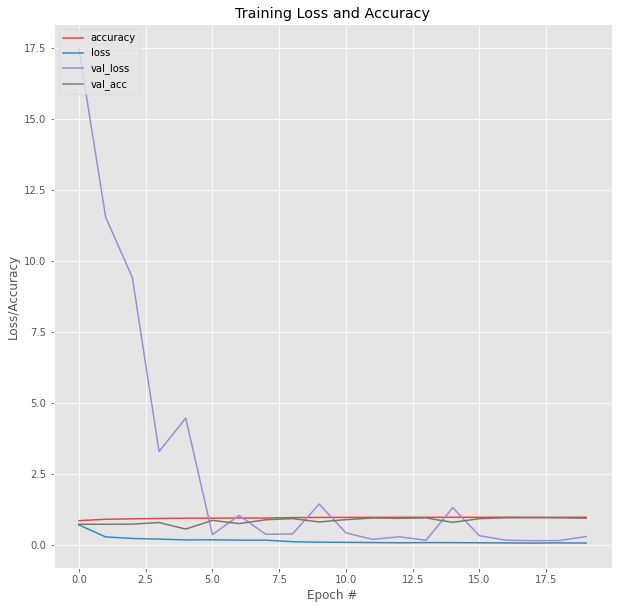

In [27]:
plt.style.use("ggplot")
plt.figure(figsize = (10,10))
plt.plot(np.arange(0, EPOCHS), PulmoNet.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, EPOCHS), PulmoNet.history["loss"], label="loss")
plt.plot(np.arange(0, EPOCHS), PulmoNet.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), PulmoNet.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("EPOCH_REPORT.png")

In [141]:
print("[INFO] evaluating network...")
predict_x = model.predict(x_test) 
classes_x = np.argmax(predict_x,axis=1)

[INFO] evaluating network...


In [154]:
print("Pneumonia probability is" , predict_x[-1][0] * 100, "%")
print("Pneumonia probability is" , predict_x[1][0] * 100, "%")


Pneumonia probability is 100.0 %
Pneumonia probability is 0.02390444278717041 %


Text(0.5, 1.0, 'PNEUMONIA')

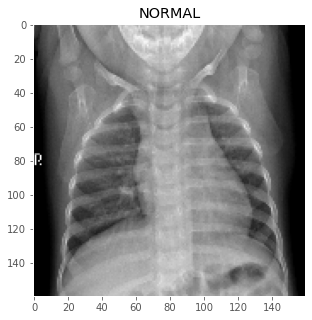

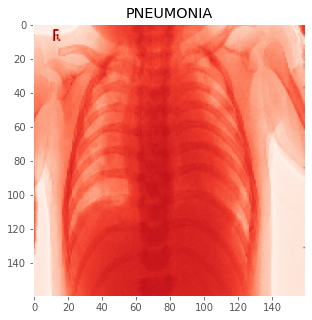

In [159]:
#plotting images with labels
plt.figure(figsize = (5,5))
plt.grid(False)
plt.imshow(test_data[1][0],cmap="gray")
plt.title(labels[test_data[1][1]])

plt.figure(figsize = (5,5))
plt.grid(False)
plt.imshow(test_data[-1][0], cmap="Reds")
plt.title(labels[test_data[-1][1]])

In [ ]:
#test shows that model is able to find correctly pneumonia